### Lib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
%matplotlib inline

### Vars

In [4]:
img_url = '/home/guillaume/Téléchargements/mushroom-dataset/dataset_images/'
dataset_url = "../../storage/datas/csv/clean/full_cleaned_dataset.csv"

### CSV Dataset

In [5]:
# Importer les DF à analyser
cleaned_dataset=pd.read_csv(dataset_url, low_memory=False)

In [6]:
print("Classification repartition:")
print("phylum:",cleaned_dataset['phylum'].nunique())
print("class:",cleaned_dataset['class'].nunique())
print("order:",cleaned_dataset['order'].nunique())
print("family:",cleaned_dataset['family'].nunique())
print("genus:",cleaned_dataset['genus'].nunique())
print("species:",cleaned_dataset['species'].nunique())

Classification repartition:
phylum: 4
class: 27
order: 99
family: 331
genus: 1564
species: 8423


In [7]:
cleaned_dataset.head(1)

,image_lien,label,family,phylum,species,canonicalName,class,genus,order
0,1.jpg,Xylaria polymorpha,Xylariaceae,Ascomycota,Xylaria polymorpha,Xylaria polymorpha,Sordariomycetes,Xylaria,Xylariales


### Repartitions

In [8]:
cleaned_dataset=pd.read_csv('../../storage/datas/csv/clean/cleaned_dataset_good_dimensions.csv',low_memory=False)

#### Phylum

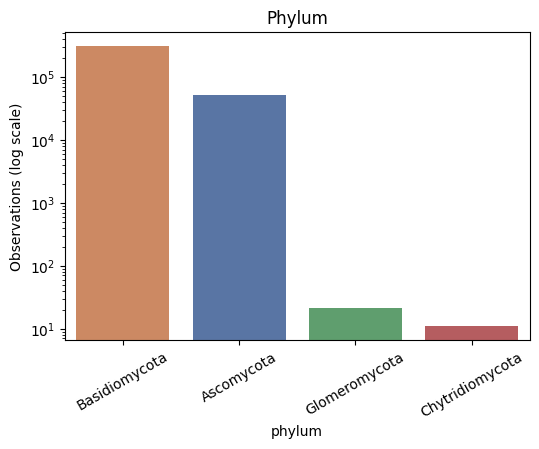

In [9]:
plt.figure(figsize=(6,4))

sns.countplot(data = cleaned_dataset,
              x = 'phylum',
              hue='phylum',
              order = cleaned_dataset["phylum"].value_counts().index,
              palette='deep',
              legend=False)

plt.title("Phylum")
plt.xticks(rotation=30)
plt.ylabel("Observations (log scale)")
plt.yscale("log")
plt.show();

#### Class

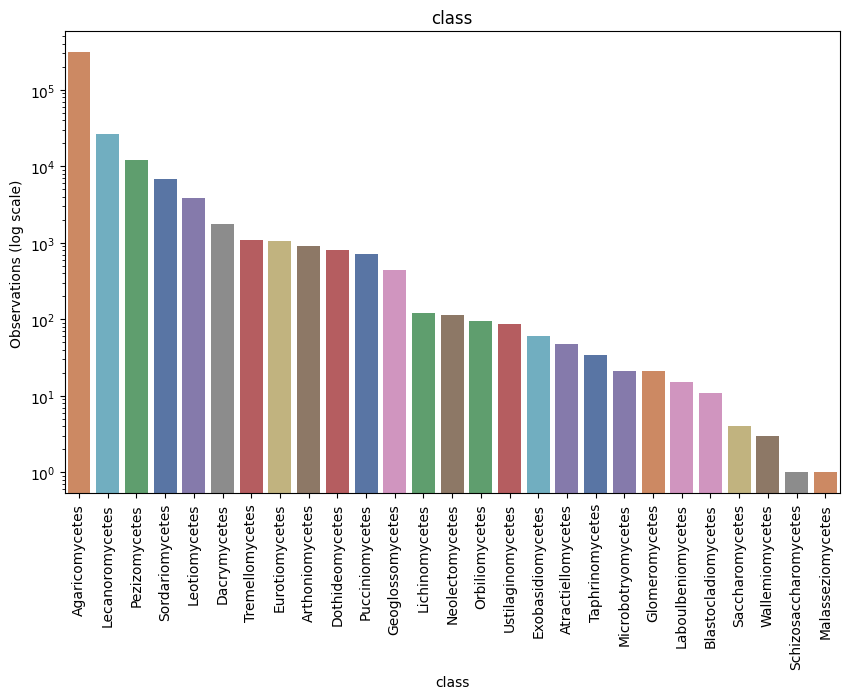

In [10]:
plt.figure(figsize=(10,6))

sns.countplot(data = cleaned_dataset,
              x = 'class',
              hue='class',
              order = cleaned_dataset["class"].value_counts().index,
              palette='deep',
              legend=False)

plt.title("class")
plt.xticks(rotation=90)
plt.ylabel("Observations (log scale)")
plt.yscale("log")
plt.show();

#### Order

In [11]:
cleaned_dataset['order'].nunique()

99

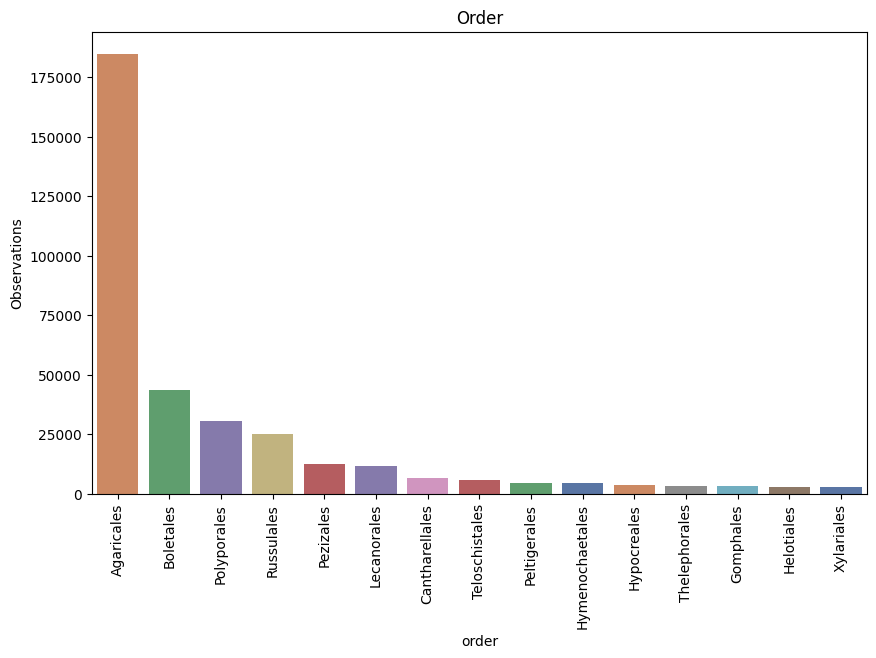

In [12]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le nombre de valeurs uniques à afficher
num_unique_values = 15

# Obtenir les valeurs les plus fréquentes
top_values = cleaned_dataset['order'].value_counts().index[:num_unique_values]

# Filtrer le dataset pour ne contenir que les valeurs les plus fréquentes
filtered_dataset = cleaned_dataset[cleaned_dataset['order'].isin(top_values)]

# Créer le graphique
plt.figure(figsize=(10,6))
sns.countplot(data = filtered_dataset,
              x = 'order',
              hue = 'order',
              order = filtered_dataset["order"].value_counts().index,
              palette='deep',
              legend = False)

plt.title("Order")
plt.xticks(rotation=90)
plt.ylabel("Observations")
plt.show()

#### Family

In [13]:
cleaned_dataset['family'].nunique()

328

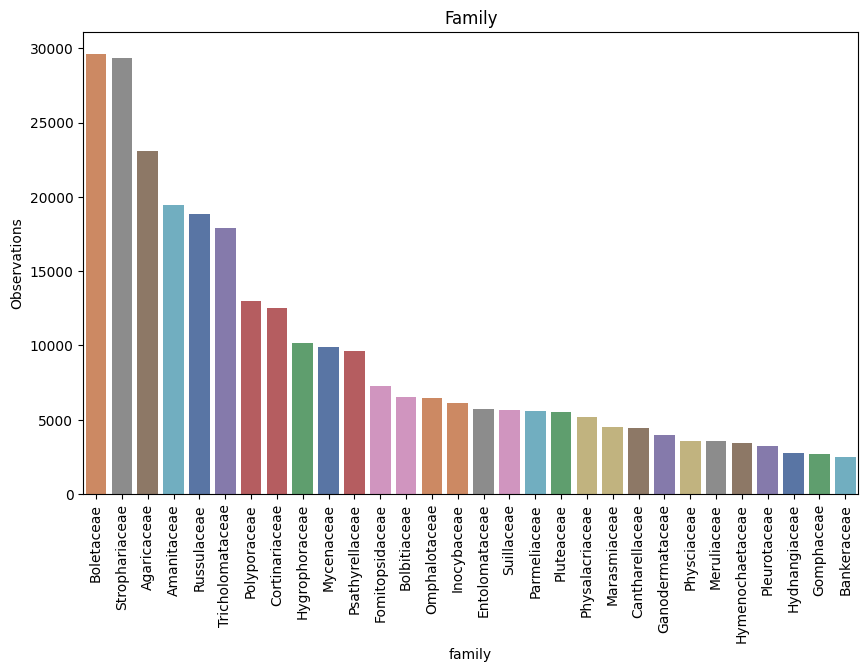

In [14]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le nombre de valeurs uniques à afficher
num_unique_values = 30

# Obtenir les valeurs les plus fréquentes
top_values = cleaned_dataset['family'].value_counts().index[:num_unique_values]

# Filtrer le dataset pour ne contenir que les valeurs les plus fréquentes
filtered_dataset = cleaned_dataset[cleaned_dataset['family'].isin(top_values)]

# Créer le graphique
plt.figure(figsize=(10,6))
sns.countplot(data = filtered_dataset,
              x = 'family',
              hue = 'family',
              order = filtered_dataset["family"].value_counts().index,
              palette='deep',
              legend = False)

plt.title("Family")
plt.xticks(rotation=90)
plt.ylabel("Observations")
plt.show()

#### Genus

In [15]:
cleaned_dataset['genus'].nunique()

1552

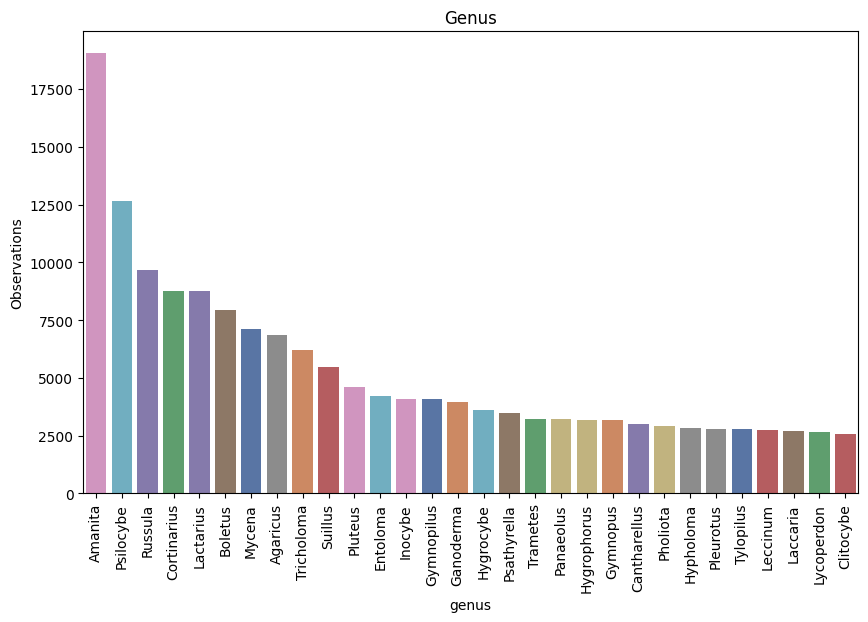

In [16]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le nombre de valeurs uniques à afficher
num_unique_values = 30

# Obtenir les valeurs les plus fréquentes
top_values = cleaned_dataset['genus'].value_counts().index[:num_unique_values]

# Filtrer le dataset pour ne contenir que les valeurs les plus fréquentes
filtered_dataset = cleaned_dataset[cleaned_dataset['genus'].isin(top_values)]

# Créer le graphique
plt.figure(figsize=(10,6))
sns.countplot(data = filtered_dataset,
              x = 'genus',
              hue = 'genus',
              order = filtered_dataset["genus"].value_counts().index,
              palette='deep',
              legend = False)

plt.title("Genus")
plt.xticks(rotation=90)
plt.ylabel("Observations")
plt.show()

#### Species

In [17]:
cleaned_dataset['species'].nunique()

8328

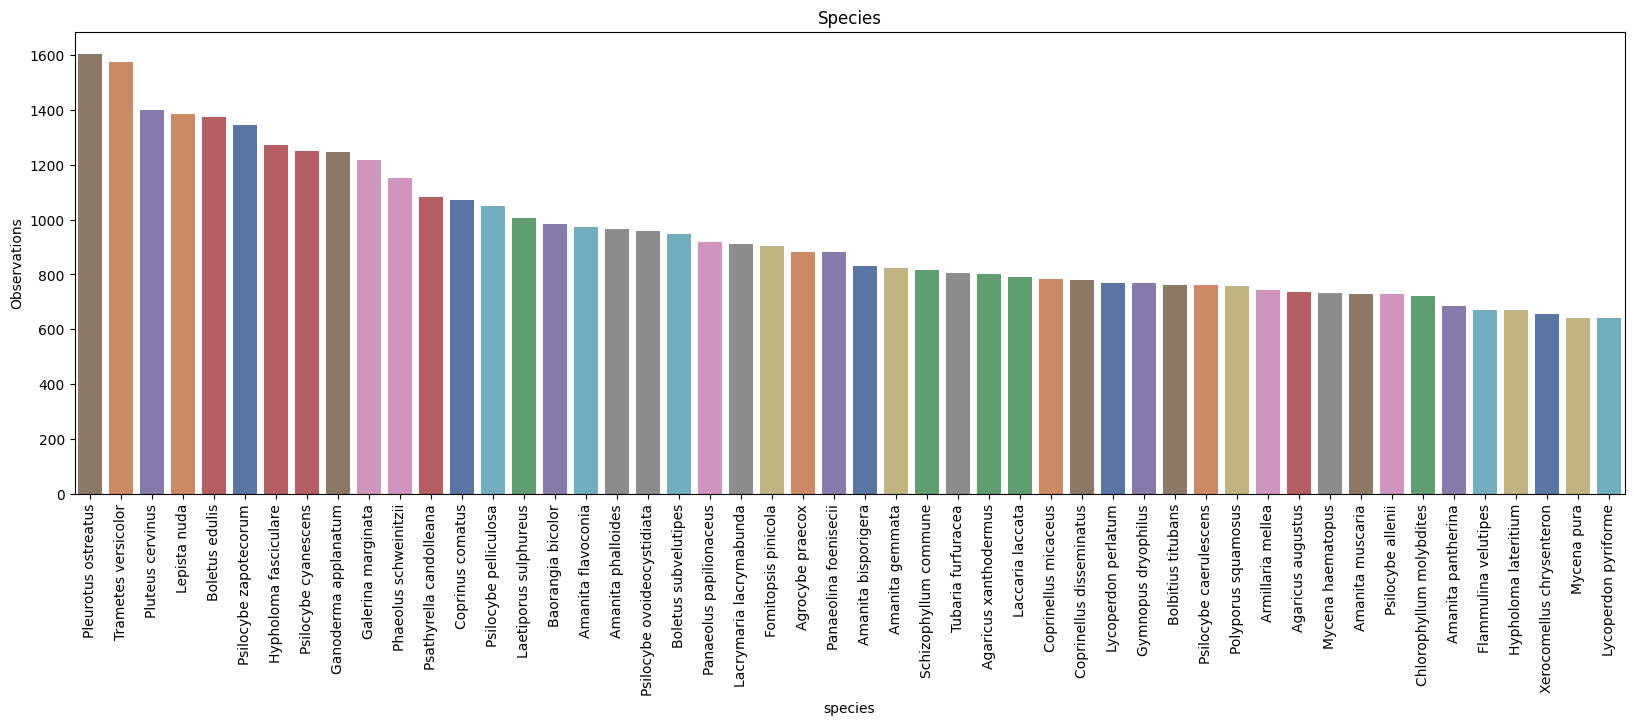

In [18]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le nombre de valeurs uniques à afficher
num_unique_values = 50

# Obtenir les valeurs les plus fréquentes
top_values = cleaned_dataset['species'].value_counts().index[:num_unique_values]

# Filtrer le dataset pour ne contenir que les valeurs les plus fréquentes
filtered_dataset = cleaned_dataset[cleaned_dataset['species'].isin(top_values)]

# Créer le graphique
plt.figure(figsize=(20,6))
sns.countplot(data = filtered_dataset,
              x = 'species',
              hue = 'species',
              order = filtered_dataset["species"].value_counts().index,
              palette='deep',
              legend = False)

plt.title("Species")
plt.xticks(rotation=90)
plt.ylabel("Observations")
plt.show()

In [22]:
# on s'interesse aux espèces représentées
print('Unique occurencies :')
print(cleaned_dataset['species'].nunique())

print('\n Label repartition by % :')
print('\n', (cleaned_dataset['label'].value_counts(normalize = True)*100).round(2))

Unique occurencies :
8328

 Label repartition by % :

 label
Trametes versicolor                0.43
Pleurotus ostreatus                0.40
Psilocybe zapotecorum              0.37
Psilocybe cyanescens               0.34
Hypholoma fasciculare              0.33
                                   ... 
Bovista gigantea                   0.00
Ramaria patagonica                 0.00
Ramaria subaurantiaca              0.00
Trichoderma microcitrinum group    0.00
Hyperdermium bertonii              0.00
Name: proportion, Length: 9162, dtype: float64


### IMGs

In [39]:
def randomImg(df, dataframe_col_label, dataframe_col_url, nb_img=5) -> None:
    """
    Display random images from a dataframe.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the image data.
    - dataframe_col_label (str): The name of the column in the dataframe that contains the labels for each image.
    - dataframe_col_url (str): The name of the column in the dataframe that contains the URLs or file paths of the images.
    - nb_img (int): The number of random images to display. Default is 5.

    Returns:
    None
    """
    plt.figure(figsize=(16,16))
    randomIndex = np.random.choice(len(df), size=nb_img, replace=False)
    column_subplot = nb_img
    row_subplot = (nb_img + column_subplot - 1) // column_subplot

    for i, j in enumerate(randomIndex):
        plt.subplot(row_subplot,column_subplot,i+1)
        plt.subplots_adjust(wspace=1, hspace=0.5)               # Avoid subplots being too close
        img = plt.imread(dataframe_col_url[j])                    # Read the image
        height, width, _ = img.shape                              # Read the dimensions of the image
        plt.axis('off')                                           # Remove axes
        plt.imshow(img)                                           # Display the image
        plt.title(f"{dataframe_col_label[j]}\n{width}x{height}")  # Image title -> Species name and dimensions


In [44]:
dataset_url = "../../storage/datas/csv/clean/cleaned_dataset_good_dimensions.csv"
cleaned_dataset_good_dimensions=pd.read_csv(dataset_url, low_memory=False)
df_img_url=cleaned_dataset_good_dimensions.copy()
df_img_url['image_lien'] = df_img_url['image_lien'].apply(lambda x: img_url + x)

In [45]:
df_img_url.head()

,image_lien,label,family,phylum,species,class,genus,order
0,/home/guillaume/Téléchargements/mushroom-datas...,Xylaria polymorpha,Xylariaceae,Ascomycota,Xylaria polymorpha,Sordariomycetes,Xylaria,Xylariales
1,/home/guillaume/Téléchargements/mushroom-datas...,Xylaria magnoliae,Xylariaceae,Ascomycota,Xylaria magnoliae,Sordariomycetes,Xylaria,Xylariales
2,/home/guillaume/Téléchargements/mushroom-datas...,Xylaria hypoxylon,Xylariaceae,Ascomycota,Xylaria hypoxylon,Sordariomycetes,Xylaria,Xylariales
3,/home/guillaume/Téléchargements/mushroom-datas...,Xylaria hypoxylon,Xylariaceae,Ascomycota,Xylaria hypoxylon,Sordariomycetes,Xylaria,Xylariales
4,/home/guillaume/Téléchargements/mushroom-datas...,Xeromphalina campanella,Mycenaceae,Basidiomycota,Xeromphalina campanella,Agaricomycetes,Xeromphalina,Agaricales


In [ ]:
randomImg(df=df_img_url,
          dataframe_col_label=df_img_url['species'],
          dataframe_col_url=df_img_url['image_lien'],
          nb_img=5)

### Extraction des features des images

In [55]:
def extract_features(url_img):
    """
    Extracts features from an image.

    Parameters:
    url_img (str): The URL or file path of the image.

    Returns:
    dict: A dictionary containing the extracted features:
        - 'largeur': The width of the image.
        - 'hauteur': The height of the image.
        - 'moyenne_rouge': The average red channel value of the image.
        - 'moyenne_vert': The average green channel value of the image.
        - 'moyenne_bleu': The average blue channel value of the image.
    """
    img = cv2.imread(url_img)
    hauteur, largeur, canal = img.shape
    features = {
        'largeur': largeur,
        'hauteur': hauteur,
        'moyenne_rouge': np.mean(img[:,:,2]),
        'moyenne_vert': np.mean(img[:,:,1]),
        'moyenne_bleu': np.mean(img[:,:,0])}
    
    return features

In [60]:
# Extraction des features des images de dans un DF nommé 'features_df'
liste_features = []

for index, row in df_img_url.iterrows():
    filepath = row['image_lien']
    features = extract_features(filepath)
    liste_features.append(features)

features_df = pd.DataFrame(liste_features)
features_df['moyenne_couleurs'] = (features_df['moyenne_rouge']\
                                   + features_df['moyenne_vert']\
                                    + features_df['moyenne_bleu']) / 3

features_df.to_csv('../../storage/datas/clean/img_features.csv', index=False)
features_df.head()

,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs
0,320,240,77.321185,72.687839,70.582227,73.530417
1,320,240,71.123307,64.609049,62.255977,65.996111
2,320,240,84.582305,70.401758,54.611263,69.865109
3,240,320,28.234687,27.118841,23.883490,26.412339
4,240,320,41.552617,35.021029,26.419349,34.330998


In [14]:
features_df.describe()

,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs,dimensions
count,388024.000000,388024.000000,388024.000000,388024.000000,388024.000000,388024.000000,388024.000000
mean,306.466474,248.857029,108.480408,99.958924,83.653073,97.364135,75326.788526
std,32.996635,38.338392,36.357114,34.485057,36.596810,34.103084,8163.999685
min,60.000000,36.000000,0.605096,1.251548,0.282886,1.502677,3600.000000
25%,320.000000,240.000000,84.212705,77.254434,58.531236,75.011770,72000.000000
50%,320.000000,240.000000,106.036120,98.209408,80.166718,95.189399,76800.000000
75%,320.000000,241.000000,128.383016,118.406777,103.158566,115.241439,76800.000000
max,320.000000,320.000000,253.050648,250.210555,250.294187,250.256192,102400.000000


### Dataset with features

In [20]:
features_df = pd.read_csv('../../storage/datas/clean/img_features.csv')

In [21]:
dataset_with_features = pd.concat([cleaned_dataset, features_df], axis=1)
df_with_features_without_images_with_bad_dimensions = dataset_with_features[(dataset_with_features['largeur'] > 200) & (dataset_with_features['hauteur'] > 200)]

In [22]:
df_with_features_without_images_with_bad_dimensions.head()

,image_lien,label,family,phylum,species,canonicalName,class,genus,order,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs,dimensions
0,1.jpg,Xylaria polymorpha,Xylariaceae,Ascomycota,Xylaria polymorpha,Xylaria polymorpha,Sordariomycetes,Xylaria,Xylariales,320,240,77.321185,72.687839,70.582227,73.530417,76800
1,2.jpg,Xylaria magnoliae,Xylariaceae,Ascomycota,Xylaria magnoliae,Xylaria magnoliae,Sordariomycetes,Xylaria,Xylariales,320,240,71.123307,64.609049,62.255977,65.996111,76800
2,3.jpg,Xylaria hypoxylon,Xylariaceae,Ascomycota,Xylaria hypoxylon,Xylaria hypoxylon,Sordariomycetes,Xylaria,Xylariales,320,240,84.582305,70.401758,54.611263,69.865109,76800
3,4.jpg,Xylaria hypoxylon,Xylariaceae,Ascomycota,Xylaria hypoxylon,Xylaria hypoxylon,Sordariomycetes,Xylaria,Xylariales,240,320,28.234687,27.118841,23.883490,26.412339,76800
4,6.jpg,Xeromphalina campanella,Mycenaceae,Basidiomycota,Xeromphalina campanella,Xeromphalina campanella,Agaricomycetes,Xeromphalina,Agaricales,240,320,41.552617,35.021029,26.419349,34.330998,76800


In [23]:
df_with_features_without_images_with_bad_dimensions_save.drop(columns=['canonicalName','largeur','hauteur','moyenne_rouge','moyenne_vert','moyenne_bleu','moyenne_couleurs','dimensions'], inplace=True)

/tmp/ipykernel_122159/3906231203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_features_without_images_with_bad_dimensions.drop(columns=['canonicalName','largeur','hauteur','moyenne_rouge','moyenne_vert','moyenne_bleu','moyenne_couleurs','dimensions'], inplace=True)


In [26]:
df_with_features_without_images_with_bad_dimensions_save.to_csv('../../storage/datas/clean/cleaned_dataset_good_dimensions.csv', index=False)

### Analyses features

In [26]:
features_extraction = df_with_features_without_images_with_bad_dimensions[['largeur', 'hauteur', 'moyenne_rouge', 'moyenne_vert', 'moyenne_bleu', 'moyenne_couleurs']]

<Figure size 1600x1200 with 0 Axes>

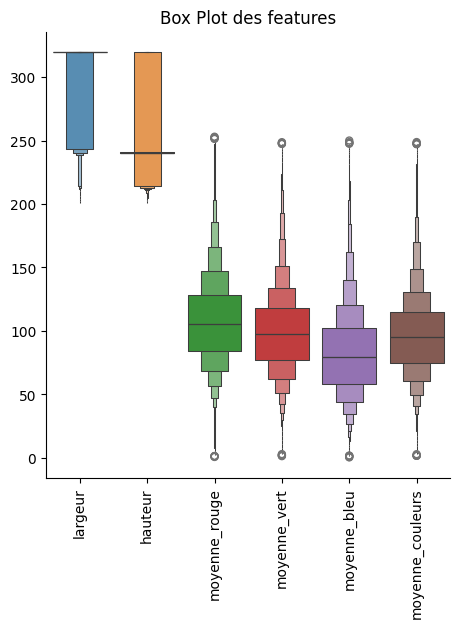

In [27]:
# Boxplot des features
plt.figure(figsize=(16,12))
sns.catplot(features_extraction, kind='boxen')
plt.grid(False)
plt.title('Box Plot des features')
plt.xticks(rotation = 90);

/tmp/ipykernel_120256/3580498988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_extraction['dimensions'] = (features_extraction['largeur'] * features_extraction['hauteur'])


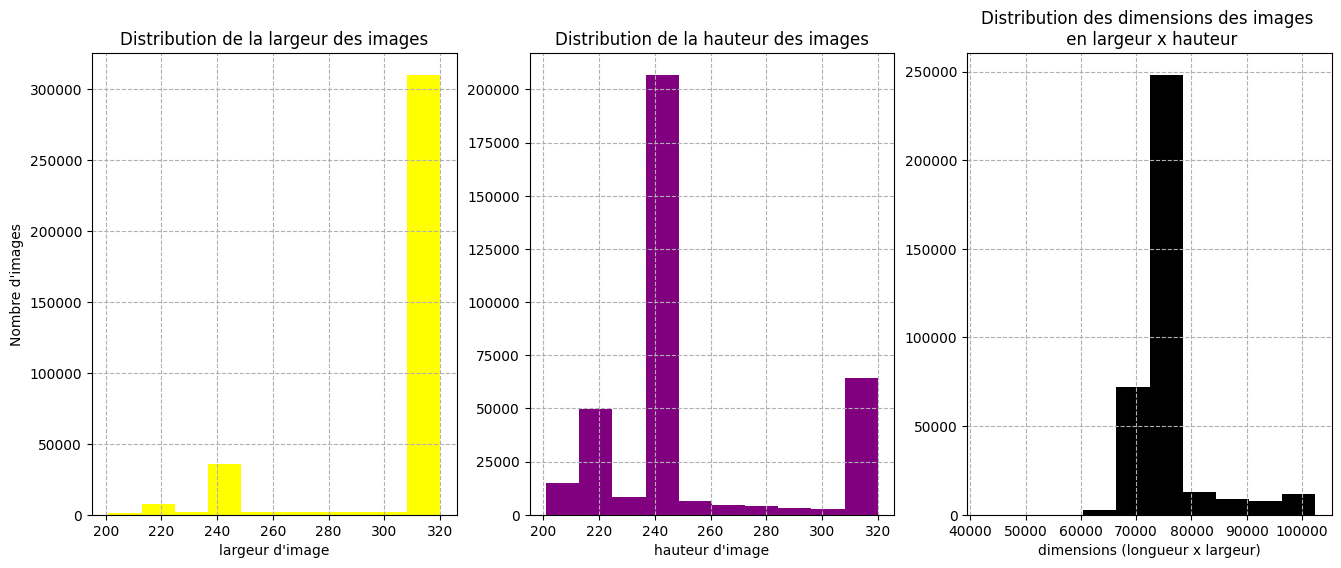

In [30]:
# On génère 3 graphs correspondant aux dimensions des images
features_extraction['dimensions'] = (features_extraction['largeur'] * features_extraction['hauteur'])
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16, 6))


# Graph des largeurs
ax1.hist(x = 'largeur', data = features_extraction, color='yellow')
ax1.set_title('Distribution de la largeur des images')
ax1.set_xlabel('largeur d\'image')
ax1.set_ylabel('Nombre d\'images')
ax1.grid(True, linestyle = '--')

# Graph des hauteurs
ax2.hist(x = 'hauteur', data = features_extraction, color='purple')
ax2.set_title('Distribution de la hauteur des images')
ax2.set_xlabel('hauteur d\'image')
ax2.grid(True, linestyle = '--')
ax2.sharey=ax1

# Grah des dimensions
ax3.hist(x = 'dimensions', data = features_extraction, color='black')
ax3.set_title('Distribution des dimensions des images \n en largeur x hauteur')
ax3.set_xlabel('dimensions (longueur x largeur)')
ax3.grid(True, linestyle = '--')
ax2.sharey=ax1;

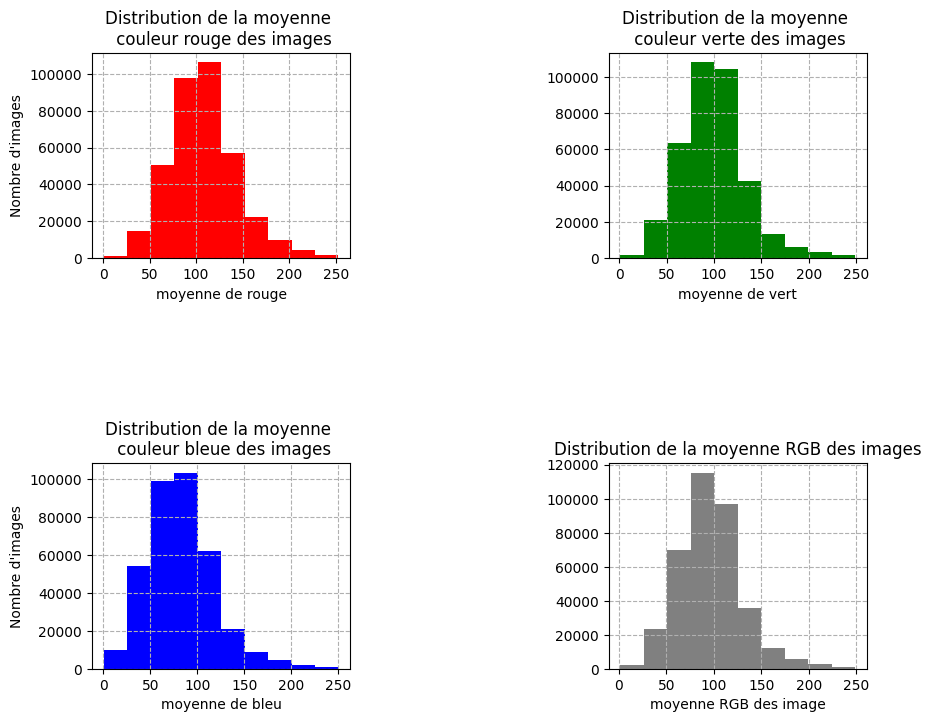

In [31]:
# On génère des graphs pour analsyer les canaux RGB de simages

fig, ((ax4,ax5),(ax6,ax7)) = plt.subplots(2,2, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=1)

# Graph de la moyenne canal rouge des images
ax4.hist(x = 'moyenne_rouge', data = features_extraction, color='red')
ax4.set_title('Distribution de la moyenne \n couleur rouge des images')
ax4.set_xlabel('moyenne de rouge')
ax4.grid(True, linestyle = '--')
ax4.set_ylabel('Nombre d\'images')

# Graph de la moyenne canal vert des images
ax5.hist(x = 'moyenne_vert', data = features_extraction, color='green')
ax5.set_title('Distribution de la moyenne \n couleur verte des images')
ax5.set_xlabel('moyenne de vert')
ax5.grid(True, linestyle = '--')
ax5.sharey=ax4

# Graph de la moyenne canal bleu des images
ax6.hist(x = 'moyenne_bleu', data = features_extraction, color='blue')
ax6.set_title('Distribution de la moyenne \n couleur bleue des images')
ax6.set_xlabel('moyenne de bleu')
ax6.grid(True, linestyle = '--')
ax6.set_ylabel('Nombre d\'images')

# Graph de la moyenne RGB images
ax7.hist(x = 'moyenne_couleurs', data = features_extraction, color='gray')
ax7.set_title('Distribution de la moyenne RGB des images')
ax7.set_xlabel('moyenne RGB des image')
ax7.grid(True, linestyle = '--')
ax7.sharey=ax6